1. Importar librerías y .csv
Importe las librerías básicas para el análisis de datos
Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato
¿Cómo lo podemos solucionar?.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [22]:
df = pd.read_csv("nations.csv", encoding = "ISO-8859-3", index_col=[0])

In [23]:
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999
6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.750000,NaN
7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN
8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN
9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.100000,NaN
10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.400000,NaN


2. Refactor gráficos matplotlib a seaborn
A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide
refactorizarlos utilizando seaborn .
Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor
similitud. Comente los principales resultados de los gráficos.


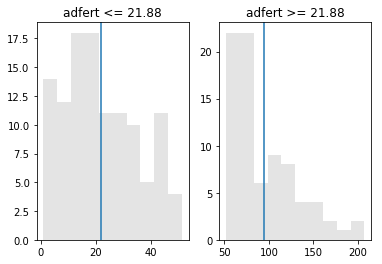

In [27]:
def binarize_histogram(dataframe, variable):
    tmp= dataframe 
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

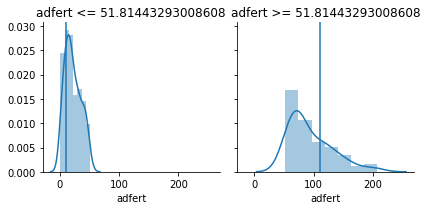

In [53]:
def binarize_hist_sns(dfr, var):
    df_mean = np.mean(dfr[var])
    tmp= dfr.copy()
    tmp.dropna(subset=[var])
    tmp['binarize'] = np.where(dfr[var] > df_mean, 1, 0)
    
    grid = sns.FacetGrid (tmp, col='binarize', col_wrap=2)
    
    graph_1, graph_2 = grid.axes
    
    graph_1.axvline(10)
    graph_2.axvline(110)
    
    axes = grid.axes.flatten()
    
    grid = grid.map(sns.distplot, var)
    
    axes[0].set_title("{} <= {}".format(var, df_mean))
    axes[1].set_title("{} >= {}".format(var, df_mean))
    
binarize_hist_sns(df, 'adfert')

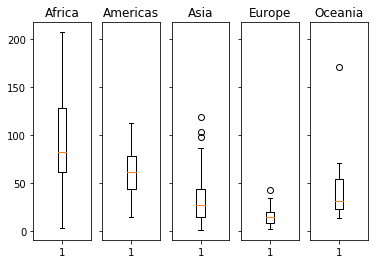

In [50]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

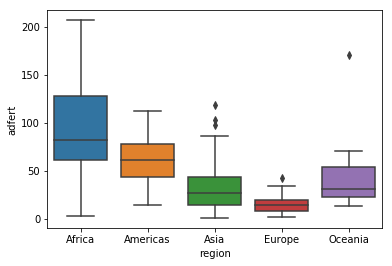

In [51]:
def grouped_boxplot_sbs(df, var, group_by):
    ax = sns.boxplot(data=df.dropna(subset=[var]), y=var, x=group_by)

grouped_boxplot_sbs(df, 'adfert', 'region')  

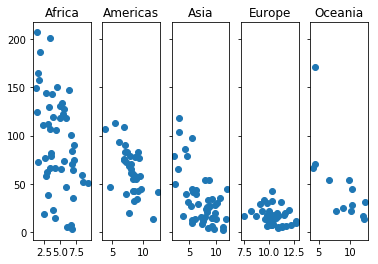

In [52]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

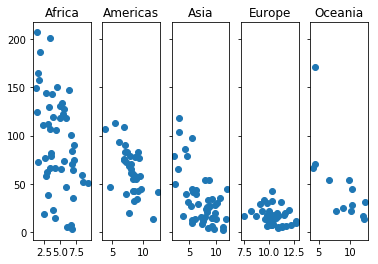

In [60]:
def grouped_scatterplot_sns(df, x, y, group_by):
    grid = sns.FacetGrid(df, col=group_by, col_wrap=5)
    grid = grid.map(plt.scatter, x, y)

grouped_scatterplot(df, 'school', 'adfert', 'region')

3. Genere un heatmap entre todas las variables
En base a las variables de interés asignadas, comente cuáles son las principales
correlaciones existentes, tomando como criterio de corte aquellas superior a .6


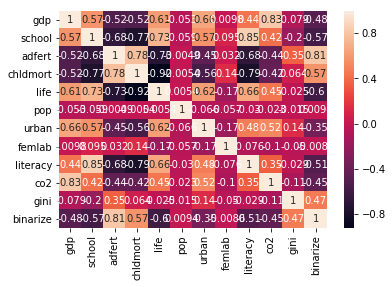

In [61]:
sns.heatmap(df.corr(), annot=True)

4. En base a las principales correlaciones, sepárelas en un
nuevo objeto y calcule la matriz de correlaciones para todas
las regiones
tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,
['variables', 'a', 'agregar']] . No olvide agregar la variable region .
tip: Genere un loop para recorrer cada región y generar un heatmap.
Comente brevemente las principales correlaciones a través de las regiones.
Bonus Points: Grafique los diagramas de dispersión para los
principales hallazgos.

In [62]:
df_tmp =df.loc[:, ['region', 'adfert', 'chldmort', "life"]]

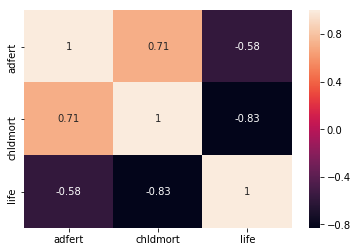

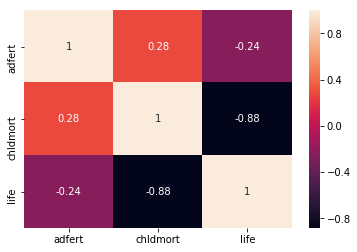

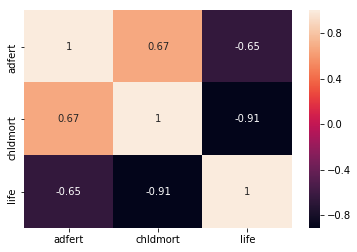

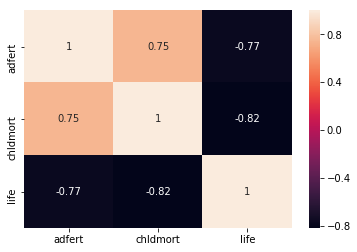

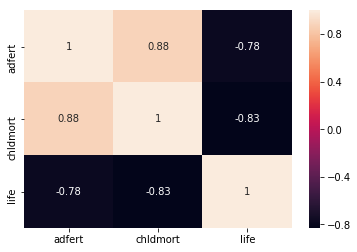

In [65]:
for i in df_tmp['region'].unique():
    plt.figure()
    sns.heatmap(df_tmp[df_tmp['region'] == i].corr(), annot=True)